In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
import pygad.kerasga


dataTrainingAwal = pd.read_csv("DataKomplit.csv")
dataTrainingAwal.head(20)
y = dataTrainingAwal.loc[:,["target"]]
x = dataTrainingAwal.drop(labels =['target','ID','STD','STA','AC','FLTID','DATOP'],axis=1)

display(dataTrainingAwal)
display(x)
display(y)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,1/3/2016,TU 0712,CMN,TUN,1/3/2016 10:30,2016-01-03 12.55.00,ATA,TU 32AIMN,260
1,train_id_1,1/13/2016,TU 0757,MXP,TUN,1/13/2016 15:05,2016-01-13 16.55.00,ATA,TU 31BIMO,20
2,train_id_2,1/16/2016,TU 0214,TUN,IST,1/16/2016 4:10,2016-01-16 06.45.00,ATA,TU 32AIMN,0
3,train_id_3,1/17/2016,TU 0480,DJE,NTE,1/17/2016 14:10,2016-01-17 17.00.00,ATA,TU 736IOK,0
4,train_id_4,1/17/2016,TU 0338,TUN,ALG,1/17/2016 14:30,2016-01-17 15.50.00,ATA,TU 320IMU,22
...,...,...,...,...,...,...,...,...,...,...
29995,train_id_29995,9/19/2016,WKL 0000,TUN,TUN,9/19/2016 23:30,2016-09-20 02.30.00,SCH,TU 320IMU,0
29996,train_id_29996,8/13/2016,UG 0009,DJE,TUN,8/13/2016 16:00,2016-08-13 17.00.00,SCH,UG AT7LBE,0
29997,train_id_29997,11/14/2016,UG 1731,NAP,TUN,11/14/2016 13:45,2016-11-14 14.55.00,SCH,TU CR9ISA,0
29998,train_id_29998,12/23/2016,UG 0002,TUN,DJE,12/23/2016 6:15,2016-12-23 07.15.00,SCH,UG AT7LBD,0


,DEPSTN,ARRSTN,STATUS
0,CMN,TUN,ATA
1,MXP,TUN,ATA
2,TUN,IST,ATA
3,DJE,NTE,ATA
4,TUN,ALG,ATA
...,...,...,...
29995,TUN,TUN,SCH
29996,DJE,TUN,SCH
29997,NAP,TUN,SCH
29998,TUN,DJE,SCH


,target
0,260
1,20
2,0
3,0
4,22
...,...
29995,0
29996,0
29997,0
29998,0


In [39]:
#mushroom
le = LabelEncoder()

cols = x.columns.values
for col in cols:
    x[col] = le.fit_transform(x[col])

data_inputs = x
# x_train = ohe.fit_transform(x_train).toarray()
# sc = StandardScaler()
# data_inputs = sc.fit_transform(x_train)
data_outputs = y.to_numpy()
print("X TRAIN AFTER ENCODING")
display(x)
print("Y TRAIN AFTER change to numpy array")
display(data_outputs)

X TRAIN AFTER ENCODING


,DEPSTN,ARRSTN,STATUS
0,19,80,0
1,52,80,0
2,80,34,0
3,22,59,0
4,80,2,0
...,...,...,...
29995,80,80,4
29996,22,80,4
29997,53,80,4
29998,80,22,4


Y TRAIN AFTER change to numpy array


array([[260],
       [ 20],
       [  0],
       ...,
       [  0],
       [  0],
       [  0]], dtype=int64)

In [40]:
dataTrainingAwal.columns
dataTrainingAwal.info()
dataTrainingAwal.describe()

print("Data Inputs Shape")
data_inputs.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30000 non-null  object
 1   DATOP   30000 non-null  object
 2   FLTID   30000 non-null  object
 3   DEPSTN  30000 non-null  object
 4   ARRSTN  30000 non-null  object
 5   STD     30000 non-null  object
 6   STA     30000 non-null  object
 7   STATUS  30000 non-null  object
 8   AC      30000 non-null  object
 9   target  30000 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 2.3+ MB
Data Inputs Shape


(30000, 3)

In [41]:
for col in data_inputs.columns:
#     if data_inputs[col].dtype == 'object':
    print(f'Unique values in column {col}: {data_inputs[col].unique()}')

Unique values in column DEPSTN: [19 52 80 22 76 34 62 48 14  0 81  3 28  6 35  2 43 73 45 65 40  8 55 60
 50 24 71 27 17 58 59 84 32 66 51 74 33 56 54 16  7 82 61 46 79 10 23 37
 11 49  1 41 12 68 44 72 47 15  4 20 21 64 78 30 53 13 63 83 57 77 36 18
 25 29  9  5 70 39 42 67 26 75 69 38 31]
Unique values in column ARRSTN: [80 34 59  2  6 62 27 55 50 47 28 14 22 45 19  7 65 32 52  8 46 35  0 82
 49 11 71 43 41 17 48 16 24 33 54 84  3 56 76 81 73 51 40 21 61 23 12 74
 44 64 58 10 79  1 83 68 20  4 66 13 30 36 15 60 37 57 72 42 63 25 78 69
 18  5 29 53  9 38 39 75 67 77 26 70 31]
Unique values in column STATUS: [0 2 3 4 1]


In [42]:
for col in dataTrainingAwal.columns:
#     if dataTrainingAwal[col].dtype == 'object':
    print(f'Unique values in column {col}: {dataTrainingAwal[col].unique()}')

Unique values in column ID: ['train_id_0' 'train_id_1' 'train_id_2' ... 'train_id_29997'
 'train_id_29998' 'train_id_29999']
Unique values in column DATOP: ['1/3/2016' '1/13/2016' '1/16/2016' '1/17/2016' '1/18/2016' '1/20/2016'
 '1/21/2016' '1/22/2016' '1/23/2016' '1/24/2016' '1/27/2016' '2/1/2016'
 '2/2/2016' '2/3/2016' '2/4/2016' '2/5/2016' '2/6/2016' '2/7/2016'
 '2/8/2016' '2/10/2016' '2/14/2016' '2/19/2016' '2/22/2016' '2/24/2016'
 '2/28/2016' '2/29/2016' '3/1/2016' '3/5/2016' '3/24/2016' '3/29/2016'
 '4/26/2016' '5/30/2016' '5/31/2016' '6/1/2016' '6/3/2016' '6/4/2016'
 '6/5/2016' '6/6/2016' '6/12/2016' '6/15/2016' '6/18/2016' '6/19/2016'
 '6/20/2016' '6/21/2016' '6/23/2016' '6/24/2016' '6/27/2016' '6/30/2016'
 '7/2/2016' '7/3/2016' '7/8/2016' '7/11/2016' '7/15/2016' '7/16/2016'
 '7/23/2016' '7/25/2016' '7/26/2016' '4/22/2016' '4/23/2016' '4/24/2016'
 '4/25/2016' '4/27/2016' '4/28/2016' '4/29/2016' '4/30/2016' '1/1/2016'
 '1/2/2016' '1/9/2016' '1/11/2016' '1/12/2016' '1/28/2016' '1

In [43]:
input_layer  = tensorflow.keras.layers.Input(3)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

In [44]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [45]:
keras_ga = pygad.kerasga.KerasGA(model=model, num_solutions=10)

In [46]:
def fitness_func(ga_instance, solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)
    
    #data_inputs = np.asarray(data_inputs).astype(np.int64)
    #data_inputs = tf.convert_to_tensor(data_inputs, dtype=tf.int64) 
    
    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    error = mae(data_outputs, predictions).numpy()

    solution_fitness = 1.0 / (error + 0.00000001)

    return solution_fitness

In [47]:
def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

In [48]:
ga_instance = pygad.GA(num_generations=100, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

In [49]:
ga_instance.run()

938/938 [==============================] - 1s 1ms/step
Generation = 1
Fitness    = 0.028597928675475108

938/938 [==============================] - 1s 1ms/step
Generation = 2
Fitness    = 0.028597928675475108

938/938 [==============================] - 1s 1ms/step
Generation = 3
Fitness    = 0.028597928675475108

938/938 [==============================] - 1s 1ms/step
Generation = 4
Fitness    = 0.028597928675475108

938/938 [==============================] - 3s 3ms/step
Generation = 5
Fitness    = 0.028597928675475108

938/938 [==============================] - 1s 1ms/step
Generation = 6
Fitness    = 0.028607412946190902

938/938 [==============================] - 1s 1ms/step
Generation = 7
Fitness    = 0.028645049923177138

938/938 [==============================] - 1s 1ms/step
Generation = 8
Fitness    = 0.028648192895861513

938/938 [==============================] - 1s 1ms/step
Generation = 9
Fitness    = 0.028658794556603664

938/938 [==============================] - 1s 1ms/step


938/938 [==============================] - 1s 1ms/step
Generation = 15
Fitness    = 0.02878781155840721

938/938 [==============================] - 1s 1ms/step
Generation = 16
Fitness    = 0.028826422687659826

938/938 [==============================] - 1s 1ms/step
Generation = 17
Fitness    = 0.028826422687659826

938/938 [==============================] - 1s 1ms/step
Generation = 18
Fitness    = 0.028844933934003694

938/938 [==============================] - 1s 1ms/step
Generation = 19
Fitness    = 0.028844933934003694

938/938 [==============================] - 1s 1ms/step
Generation = 20
Fitness    = 0.028844933934003694

938/938 [==============================] - 1s 1ms/step
Generation = 21
Fitness    = 0.028845124371863838

938/938 [==============================] - 1s 1ms/step
Generation = 22
Fitness    = 0.028845124371863838

938/938 [==============================] - 1s 1ms/step
Generation = 23
Fitness    = 0.028845124371863838

938/938 [==============================] - 1s 1

938/938 [==============================] - 1s 1ms/step
Generation = 30
Fitness    = 0.02889361856070412

938/938 [==============================] - 1s 1ms/step
Generation = 31
Fitness    = 0.02892290255601786

938/938 [==============================] - 1s 1ms/step
Generation = 32
Fitness    = 0.028931482844905366

938/938 [==============================] - 1s 1ms/step
Generation = 33
Fitness    = 0.028963550713622735

938/938 [==============================] - 1s 1ms/step
Generation = 34
Fitness    = 0.028980636525528417

938/938 [==============================] - 1s 1ms/step
Generation = 35
Fitness    = 0.028980636525528417

938/938 [==============================] - 1s 1ms/step
Generation = 36
Fitness    = 0.028995324132779447

938/938 [==============================] - 1s 1ms/step
Generation = 37
Fitness    = 0.02899543958977291

938/938 [==============================] - 1s 1ms/step
Generation = 38
Fitness    = 0.029030301498336582

938/938 [==============================] - 1s 1ms

938/938 [==============================] - 1s 1ms/step
Generation = 45
Fitness    = 0.029078711203327338

938/938 [==============================] - 1s 1ms/step
Generation = 46
Fitness    = 0.029079985370792837

938/938 [==============================] - 1s 1ms/step
Generation = 47
Fitness    = 0.029079985370792837

938/938 [==============================] - 1s 1ms/step
Generation = 48
Fitness    = 0.029079985370792837

938/938 [==============================] - 1s 1ms/step
Generation = 49
Fitness    = 0.02909342737893831

938/938 [==============================] - 1s 1ms/step
Generation = 50
Fitness    = 0.02909342737893831

938/938 [==============================] - 1s 1ms/step
Generation = 51
Fitness    = 0.02910688505162058

938/938 [==============================] - 1s 1ms/step
Generation = 52
Fitness    = 0.02910688505162058

938/938 [==============================] - 1s 1ms/step
Generation = 53
Fitness    = 0.029114517456357826

938/938 [==============================] - 1s 1ms/

938/938 [==============================] - 1s 1ms/step
Generation = 60
Fitness    = 0.029150875544161136

938/938 [==============================] - 1s 1ms/step
Generation = 61
Fitness    = 0.029150875544161136

938/938 [==============================] - 1s 1ms/step
Generation = 62
Fitness    = 0.02915552802393294

938/938 [==============================] - 1s 1ms/step
Generation = 63
Fitness    = 0.02915552802393294

938/938 [==============================] - 1s 1ms/step
Generation = 64
Fitness    = 0.0291573051119121

938/938 [==============================] - 1s 1ms/step
Generation = 65
Fitness    = 0.02916017550161693

938/938 [==============================] - 1s 1ms/step
Generation = 66
Fitness    = 0.029164743343109988

938/938 [==============================] - 1s 1ms/step
Generation = 67
Fitness    = 0.029164743343109988

938/938 [==============================] - 1s 1ms/step
Generation = 68
Fitness    = 0.029164743343109988

938/938 [==============================] - 1s 1ms/s

938/938 [==============================] - 1s 992us/step
Generation = 75
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 996us/step
Generation = 76
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 1ms/step
Generation = 77
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 1ms/step
Generation = 78
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 1ms/step
Generation = 79
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 1ms/step
Generation = 80
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 1ms/step
Generation = 81
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 1ms/step
Generation = 82
Fitness    = 0.029179442812215534

938/938 [==============================] - 1s 1ms/step
Generation = 83
Fitness    = 0.029179579228239785

938/938 [==============================] -

938/938 [==============================] - 1s 1ms/step
Generation = 90
Fitness    = 0.02918108963374735

938/938 [==============================] - 1s 1ms/step
Generation = 91
Fitness    = 0.02918271390016214

938/938 [==============================] - 1s 1ms/step
Generation = 92
Fitness    = 0.029185290357533002

938/938 [==============================] - 1s 1ms/step
Generation = 93
Fitness    = 0.029185290357533002

938/938 [==============================] - 1s 1ms/step
Generation = 94
Fitness    = 0.029185290357533002

938/938 [==============================] - 1s 1ms/step
Generation = 95
Fitness    = 0.029185290357533002

938/938 [==============================] - 1s 1ms/step
Generation = 96
Fitness    = 0.029185290357533002

938/938 [==============================] - 1s 1ms/step
Generation = 97
Fitness    = 0.029185290357533002

938/938 [==============================] - 1s 1ms/step
Generation = 98
Fitness    = 0.029185290357533002

938/938 [==============================] - 1s 1m

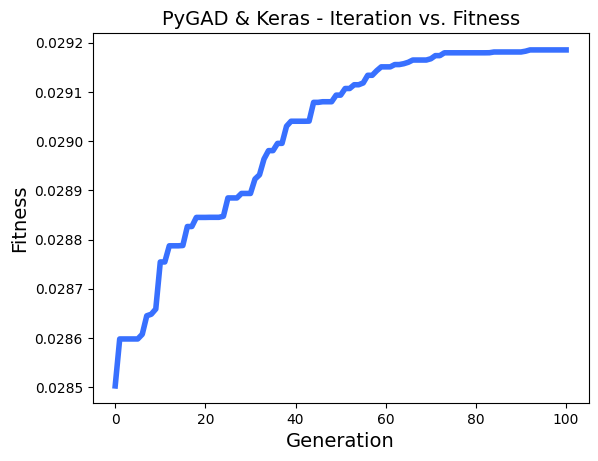

In [50]:
fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [51]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

938/938 [==============================] - 1s 1ms/step
Parameters of the best solution:
[ 0.13811515 -0.8223742   0.0698675   0.29073917 -1.37499061  0.10455707
 -1.44241296 -0.70020533  0.28319155  0.26319389 -5.50578624  2.05461536
  1.93326531 -1.29176665 -0.14838039  4.16157611  0.88772352 -0.76902537
  0.2553426   2.08767619  0.68974121  1.71540272  1.84430107  0.04448311
  0.78397935 -1.32116062]

Length of the solution is: 26

Fitness value of the best solution:
0.029185290357533002



In [52]:
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

938/938 [==============================] - 1s 996us/step
Predictions:
 [[10.393512  ]
 [13.964002  ]
 [13.096639  ]
 ...
 [ 0.15357804]
 [-0.22787142]
 [-0.2473445 ]]

Correct Outputs:
 [[260]
 [ 20]
 [  0]
 ...
 [  0]
 [  0]
 [  0]]



In [53]:
mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error:\n", abs_error)

Absolute Error:
 34.263836
